# Prediction of Space Mission Success using Logistic Regression Algorithm 

A comparative investigation with Python and R in OSEMN framework

Zahid Hasan Shovon
BAC ID:  2020162006
LTU ID:
Semester: Fall 2022
Email: jnshovon@hotmail.com

School of Communication, Business & Law
Leeds Trinity University, UK




In [4]:
# Importing required libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
%matplotlib inline

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly as py

#importing modeling libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

# Step 1: Obtain  

In [5]:
space_df = pd.read_csv("space.csv")

In [6]:
type(space_df)

pandas.core.frame.DataFrame

In [7]:
space_df.head(20)

Company                                           Location  \
0      RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
1      RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
2        US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
3           AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4        US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
5           AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
6        US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
7           AMBA             LC-5, Cape Canaveral AFS, Florida, USA   
8      RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
9        US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
10     RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
11       US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
12       US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
13       US Navy  Douglas F4D Skyray, Naval Air Station Point Mu...   
14          AMBA             LC-5, Cape Canaveral AFS, Florida, USA   
15       US Navy  Douglas F4D Skyray, Naval Air Station Point Mu...   
16  US Air Force          SLC-17A, Cape Canaveral AFS, Florida, USA   
17       US Navy  Douglas F4D Skyray, Naval Air Station Point Mu...   
18          AMBA             LC-5, Cape Canaveral AFS, Florida, USA   
19       US Navy  Douglas F4D Skyray, Naval Air Station Point Mu...   

          Date      Time              Rocket         Mission RocketStatus  \
0   1957-10-04  19:28:00      Sputnik 8K71PS       Sputnik-1      Retired   
1   1957-11-03  02:30:00      Sputnik 8K71PS       Sputnik-2      Retired   
2   1957-12-06  16:44:00            Vanguard    Vanguard TV3      Retired   
3   1958-02-01  03:48:00              Juno I      Explorer 1      Retired   
4   1958-02-05  07:33:00            Vanguard  Vanguard TV3BU      Retired   
5   1958-03-05  18:27:00              Juno I      Explorer 2      Retired   
6   1958-03-17  12:15:00            Vanguard      Vanguard 1      Retired   
7   1958-03-26  17:38:00              Juno I      Explorer 3      Retired   
8   1958-04-27  09:01:00        Sputnik 8A91    Sputnik-3 #1      Retired   
9   1958-04-28  02:53:00            Vanguard    Vanguard TV5      Retired   
10  1958-05-15  07:12:00        Sputnik 8A91    Sputnik-3 #2      Retired   
11  1958-05-28  03:46:00            Vanguard  Vanguard SLV-1      Retired   
12  1958-06-26  05:00:00            Vanguard  Vanguard SLV-2      Retired   
13  1958-07-25       NaN  NOTS-EV-1 Pilot II    Pilot-1 (D1)      Retired   
14  1958-07-26  15:00:00              Juno I      Explorer 4      Retired   
15  1958-08-12       NaN  NOTS-EV-1 Pilot II    Pilot-2 (D2)      Retired   
16  1958-08-17  12:18:00   Thor-DM 18 Able I       Pioneer 0      Retired   
17  1958-08-22       NaN  NOTS-EV-1 Pilot II    Pilot-3 (D3)      Retired   
18  1958-08-24  06:17:00              Juno I      Explorer 5      Retired   
19  1958-08-25       NaN  NOTS-EV-1 Pilot II    Pilot-4 (R1)      Retired   

   Price MissionStatus  
0    NaN       Success  
1    NaN       Success  
2    NaN       Failure  
3    NaN       Success  
4    NaN       Failure  
5    NaN       Failure  
6    NaN       Success  
7    NaN       Success  
8    NaN       Failure  
9    NaN       Failure  
10   NaN       Success  
11   NaN       Failure  
12   NaN       Failure  
13   NaN       Failure  
14   NaN       Success  
15   NaN       Failure  
16   NaN       Failure  
17   NaN       Failure  
18   NaN       Failure  
19   NaN       Failure

In [8]:
space_df.tail()

Company                                         Location        Date  \
4625     SpaceX          SLC-4E, Vandenberg SFB, California, USA  2022-07-22   
4626       CASC  LC-101, Wenchang Satellite Launch Center, China  2022-07-24   
4627     SpaceX       LC-39A, Kennedy Space Center, Florida, USA  2022-07-24   
4628  CAS Space           Jiuquan Satellite Launch Center, China  2022-07-27   
4629       CASC     LC-3, Xichang Satellite Launch Center, China  2022-07-29   

          Time            Rocket              Mission RocketStatus  Price  \
4625  17:39:00  Falcon 9 Block 5   Starlink Group 3-2       Active     67   
4626  06:22:00     Long March 5B              Wentian       Active    NaN   
4627  13:38:00  Falcon 9 Block 5  Starlink Group 4-25       Active     67   
4628  04:12:00        Zhongke-1A          Demo Flight       Active    NaN   
4629  13:28:00     Long March 2D   Yaogan 35 Group 03       Active  29.75   

     MissionStatus  
4625       Success  
4626       Success  
4627       Success  
4628       Success  
4629       Success

In [9]:
space_df.describe()

Company                                    Location        Date  \
count        4630                                        4630        4630   
unique         62                                         158        4180   
top     RVSN USSR  Site 31/6, Baikonur Cosmodrome, Kazakhstan  1962-04-26   
freq         1777                                         251           4   

            Time              Rocket Mission RocketStatus Price MissionStatus  
count       4503                4630    4630         4630  1265          4630  
unique      1300                 370    4556            2    65             4  
top     12:00:00  Cosmos-3M (11K65M)     DSP      Retired   450       Success  
freq          52                 446       8         3620   136          4162

# Step 2: Scrub

In [10]:
space_df['MissionStatus'].value_counts()

Success              4162
Failure               357
Partial Failure       107
Prelaunch Failure       4
Name: MissionStatus, dtype: int64

In [11]:
pd.get_dummies(space_df['MissionStatus']).head()

Failure  Partial Failure  Prelaunch Failure  Success
0        0                0                  0        1
1        0                0                  0        1
2        1                0                  0        0
3        0                0                  0        1
4        1                0                  0        0

In [12]:
space_df['MissionStatus'] = space_df['MissionStatus'].replace(['Partial Failure', 'Prelaunch Failure',], ['Success', 'Failure',])

In [13]:
space_df['MissionStatus'].value_counts()

Success    4269
Failure     361
Name: MissionStatus, dtype: int64

In [14]:
pd.get_dummies(space_df['MissionStatus']).head()

Failure  Success
0        0        1
1        0        1
2        1        0
3        0        1
4        1        0

In [15]:
Status = pd.get_dummies(space_df['MissionStatus'],drop_first=True)
Status

Success
0           1
1           1
2           0
3           1
4           0
...       ...
4625        1
4626        1
4627        1
4628        1
4629        1

[4630 rows x 1 columns]

In [16]:
space_df = pd.concat([space_df, Status], axis=1)

In [17]:
space_df

Company                                         Location        Date  \
0     RVSN USSR        Site 1/5, Baikonur Cosmodrome, Kazakhstan  1957-10-04   
1     RVSN USSR        Site 1/5, Baikonur Cosmodrome, Kazakhstan  1957-11-03   
2       US Navy         LC-18A, Cape Canaveral AFS, Florida, USA  1957-12-06   
3          AMBA         LC-26A, Cape Canaveral AFS, Florida, USA  1958-02-01   
4       US Navy         LC-18A, Cape Canaveral AFS, Florida, USA  1958-02-05   
...         ...                                              ...         ...   
4625     SpaceX          SLC-4E, Vandenberg SFB, California, USA  2022-07-22   
4626       CASC  LC-101, Wenchang Satellite Launch Center, China  2022-07-24   
4627     SpaceX       LC-39A, Kennedy Space Center, Florida, USA  2022-07-24   
4628  CAS Space           Jiuquan Satellite Launch Center, China  2022-07-27   
4629       CASC     LC-3, Xichang Satellite Launch Center, China  2022-07-29   

          Time            Rocket              Mission RocketStatus  Price  \
0     19:28:00    Sputnik 8K71PS            Sputnik-1      Retired    NaN   
1     02:30:00    Sputnik 8K71PS            Sputnik-2      Retired    NaN   
2     16:44:00          Vanguard         Vanguard TV3      Retired    NaN   
3     03:48:00            Juno I           Explorer 1      Retired    NaN   
4     07:33:00          Vanguard       Vanguard TV3BU      Retired    NaN   
...        ...               ...                  ...          ...    ...   
4625  17:39:00  Falcon 9 Block 5   Starlink Group 3-2       Active     67   
4626  06:22:00     Long March 5B              Wentian       Active    NaN   
4627  13:38:00  Falcon 9 Block 5  Starlink Group 4-25       Active     67   
4628  04:12:00        Zhongke-1A          Demo Flight       Active    NaN   
4629  13:28:00     Long March 2D   Yaogan 35 Group 03       Active  29.75   

     MissionStatus  Success  
0          Success        1  
1          Success        1  
2          Failure        0  
3          Success        1  
4          Failure        0  
...            ...      ...  
4625       Success        1  
4626       Success        1  
4627       Success        1  
4628       Success        1  
4629       Success        1  

[4630 rows x 10 columns]

In [18]:
space_df

Company                                         Location        Date  \
0     RVSN USSR        Site 1/5, Baikonur Cosmodrome, Kazakhstan  1957-10-04   
1     RVSN USSR        Site 1/5, Baikonur Cosmodrome, Kazakhstan  1957-11-03   
2       US Navy         LC-18A, Cape Canaveral AFS, Florida, USA  1957-12-06   
3          AMBA         LC-26A, Cape Canaveral AFS, Florida, USA  1958-02-01   
4       US Navy         LC-18A, Cape Canaveral AFS, Florida, USA  1958-02-05   
...         ...                                              ...         ...   
4625     SpaceX          SLC-4E, Vandenberg SFB, California, USA  2022-07-22   
4626       CASC  LC-101, Wenchang Satellite Launch Center, China  2022-07-24   
4627     SpaceX       LC-39A, Kennedy Space Center, Florida, USA  2022-07-24   
4628  CAS Space           Jiuquan Satellite Launch Center, China  2022-07-27   
4629       CASC     LC-3, Xichang Satellite Launch Center, China  2022-07-29   

          Time            Rocket              Mission RocketStatus  Price  \
0     19:28:00    Sputnik 8K71PS            Sputnik-1      Retired    NaN   
1     02:30:00    Sputnik 8K71PS            Sputnik-2      Retired    NaN   
2     16:44:00          Vanguard         Vanguard TV3      Retired    NaN   
3     03:48:00            Juno I           Explorer 1      Retired    NaN   
4     07:33:00          Vanguard       Vanguard TV3BU      Retired    NaN   
...        ...               ...                  ...          ...    ...   
4625  17:39:00  Falcon 9 Block 5   Starlink Group 3-2       Active     67   
4626  06:22:00     Long March 5B              Wentian       Active    NaN   
4627  13:38:00  Falcon 9 Block 5  Starlink Group 4-25       Active     67   
4628  04:12:00        Zhongke-1A          Demo Flight       Active    NaN   
4629  13:28:00     Long March 2D   Yaogan 35 Group 03       Active  29.75   

     MissionStatus  Success  
0          Success        1  
1          Success        1  
2          Failure        0  
3          Success        1  
4          Failure        0  
...            ...      ...  
4625       Success        1  
4626       Success        1  
4627       Success        1  
4628       Success        1  
4629       Success        1  

[4630 rows x 10 columns]

In [19]:
#function to extract the name of the country from the location
def extract_country_name(Location):
    country = Location.split(',')[-1]
    country = country.strip()
    return country

#dictionary to help in mapping to get consistent and correct Country Names
countries_dict = {
    'Russia' : 'Russian Federation',
    'New Mexico' : 'USA',
    "Yellow Sea": 'China',
    "Shahrud Missile Test Site": "Iran",
    "Pacific Missile Range Facility": 'USA',
    "Barents Sea": 'Russian Federation',
    "Gran Canaria": 'USA'
}

space_df['Country'] = space_df['Location'].apply(lambda x: extract_country_name(x))
space_df['Country'] = space_df['Country'].replace(countries_dict)
space_df['Country']

0       Kazakhstan
1       Kazakhstan
2              USA
3              USA
4              USA
           ...    
4625           USA
4626         China
4627           USA
4628         China
4629         China
Name: Country, Length: 4630, dtype: object

In [20]:
space_df

Company                                         Location        Date  \
0     RVSN USSR        Site 1/5, Baikonur Cosmodrome, Kazakhstan  1957-10-04   
1     RVSN USSR        Site 1/5, Baikonur Cosmodrome, Kazakhstan  1957-11-03   
2       US Navy         LC-18A, Cape Canaveral AFS, Florida, USA  1957-12-06   
3          AMBA         LC-26A, Cape Canaveral AFS, Florida, USA  1958-02-01   
4       US Navy         LC-18A, Cape Canaveral AFS, Florida, USA  1958-02-05   
...         ...                                              ...         ...   
4625     SpaceX          SLC-4E, Vandenberg SFB, California, USA  2022-07-22   
4626       CASC  LC-101, Wenchang Satellite Launch Center, China  2022-07-24   
4627     SpaceX       LC-39A, Kennedy Space Center, Florida, USA  2022-07-24   
4628  CAS Space           Jiuquan Satellite Launch Center, China  2022-07-27   
4629       CASC     LC-3, Xichang Satellite Launch Center, China  2022-07-29   

          Time            Rocket              Mission RocketStatus  Price  \
0     19:28:00    Sputnik 8K71PS            Sputnik-1      Retired    NaN   
1     02:30:00    Sputnik 8K71PS            Sputnik-2      Retired    NaN   
2     16:44:00          Vanguard         Vanguard TV3      Retired    NaN   
3     03:48:00            Juno I           Explorer 1      Retired    NaN   
4     07:33:00          Vanguard       Vanguard TV3BU      Retired    NaN   
...        ...               ...                  ...          ...    ...   
4625  17:39:00  Falcon 9 Block 5   Starlink Group 3-2       Active     67   
4626  06:22:00     Long March 5B              Wentian       Active    NaN   
4627  13:38:00  Falcon 9 Block 5  Starlink Group 4-25       Active     67   
4628  04:12:00        Zhongke-1A          Demo Flight       Active    NaN   
4629  13:28:00     Long March 2D   Yaogan 35 Group 03       Active  29.75   

     MissionStatus  Success     Country  
0          Success        1  Kazakhstan  
1          Success        1  Kazakhstan  
2          Failure        0         USA  
3          Success        1         USA  
4          Failure        0         USA  
...            ...      ...         ...  
4625       Success        1         USA  
4626       Success        1       China  
4627       Success        1         USA  
4628       Success        1       China  
4629       Success        1       China  

[4630 rows x 11 columns]

In [21]:
#extracting date-time features
space_df['Date'] = pd.to_datetime(space_df['Date'])
space_df['year'] = space_df['Date'].apply(lambda datetime: datetime.year)
space_df['month'] = space_df['Date'].apply(lambda datetime: datetime.month)
space_df['weekday'] = space_df['Date'].apply(lambda datetime: datetime.weekday())
space_df

Company                                         Location       Date  \
0     RVSN USSR        Site 1/5, Baikonur Cosmodrome, Kazakhstan 1957-10-04   
1     RVSN USSR        Site 1/5, Baikonur Cosmodrome, Kazakhstan 1957-11-03   
2       US Navy         LC-18A, Cape Canaveral AFS, Florida, USA 1957-12-06   
3          AMBA         LC-26A, Cape Canaveral AFS, Florida, USA 1958-02-01   
4       US Navy         LC-18A, Cape Canaveral AFS, Florida, USA 1958-02-05   
...         ...                                              ...        ...   
4625     SpaceX          SLC-4E, Vandenberg SFB, California, USA 2022-07-22   
4626       CASC  LC-101, Wenchang Satellite Launch Center, China 2022-07-24   
4627     SpaceX       LC-39A, Kennedy Space Center, Florida, USA 2022-07-24   
4628  CAS Space           Jiuquan Satellite Launch Center, China 2022-07-27   
4629       CASC     LC-3, Xichang Satellite Launch Center, China 2022-07-29   

          Time            Rocket              Mission RocketStatus  Price  \
0     19:28:00    Sputnik 8K71PS            Sputnik-1      Retired    NaN   
1     02:30:00    Sputnik 8K71PS            Sputnik-2      Retired    NaN   
2     16:44:00          Vanguard         Vanguard TV3      Retired    NaN   
3     03:48:00            Juno I           Explorer 1      Retired    NaN   
4     07:33:00          Vanguard       Vanguard TV3BU      Retired    NaN   
...        ...               ...                  ...          ...    ...   
4625  17:39:00  Falcon 9 Block 5   Starlink Group 3-2       Active     67   
4626  06:22:00     Long March 5B              Wentian       Active    NaN   
4627  13:38:00  Falcon 9 Block 5  Starlink Group 4-25       Active     67   
4628  04:12:00        Zhongke-1A          Demo Flight       Active    NaN   
4629  13:28:00     Long March 2D   Yaogan 35 Group 03       Active  29.75   

     MissionStatus  Success     Country  year  month  weekday  
0          Success        1  Kazakhstan  1957     10        4  
1          Success        1  Kazakhstan  1957     11        6  
2          Failure        0         USA  1957     12        4  
3          Success        1         USA  1958      2        5  
4          Failure        0         USA  1958      2        2  
...            ...      ...         ...   ...    ...      ...  
4625       Success        1         USA  2022      7        4  
4626       Success        1       China  2022      7        6  
4627       Success        1         USA  2022      7        6  
4628       Success        1       China  2022      7        2  
4629       Success        1       China  2022      7        4  

[4630 rows x 14 columns]

# Checking dataset information

In [22]:
space_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company        4630 non-null   object        
 1   Location       4630 non-null   object        
 2   Date           4630 non-null   datetime64[ns]
 3   Time           4503 non-null   object        
 4   Rocket         4630 non-null   object        
 5   Mission        4630 non-null   object        
 6   RocketStatus   4630 non-null   object        
 7   Price          1265 non-null   object        
 8   MissionStatus  4630 non-null   object        
 9   Success        4630 non-null   uint8         
 10  Country        4630 non-null   object        
 11  year           4630 non-null   int64         
 12  month          4630 non-null   int64         
 13  weekday        4630 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(9), uint8(1)
memory usage: 474.9+

# Step 3: Explore

In [23]:
len(space_df)

4630

In [24]:
# Checking Null Values 

In [25]:
space_df.isnull().sum()

Company             0
Location            0
Date                0
Time              127
Rocket              0
Mission             0
RocketStatus        0
Price            3365
MissionStatus       0
Success             0
Country             0
year                0
month               0
weekday             0
dtype: int64

In [26]:
# Heatmap for null values 

<AxesSubplot:>

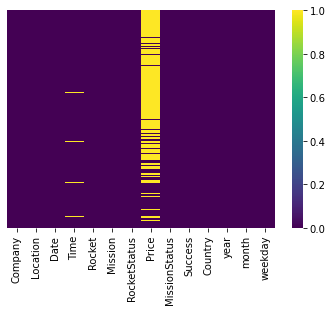

In [27]:
sns.heatmap(space_df.isnull(), yticklabels = False, cmap = 'viridis')

In [28]:
#since the null values is large, we'll delete the the column "rocket" from the dataset

In [29]:
space_df.drop([' Rocket'], axis=1, inplace=True)
space_df

KeyError: "[' Rocket'] not found in axis"

In [30]:
space_df

Company                                         Location       Date  \
0     RVSN USSR        Site 1/5, Baikonur Cosmodrome, Kazakhstan 1957-10-04   
1     RVSN USSR        Site 1/5, Baikonur Cosmodrome, Kazakhstan 1957-11-03   
2       US Navy         LC-18A, Cape Canaveral AFS, Florida, USA 1957-12-06   
3          AMBA         LC-26A, Cape Canaveral AFS, Florida, USA 1958-02-01   
4       US Navy         LC-18A, Cape Canaveral AFS, Florida, USA 1958-02-05   
...         ...                                              ...        ...   
4625     SpaceX          SLC-4E, Vandenberg SFB, California, USA 2022-07-22   
4626       CASC  LC-101, Wenchang Satellite Launch Center, China 2022-07-24   
4627     SpaceX       LC-39A, Kennedy Space Center, Florida, USA 2022-07-24   
4628  CAS Space           Jiuquan Satellite Launch Center, China 2022-07-27   
4629       CASC     LC-3, Xichang Satellite Launch Center, China 2022-07-29   

          Time            Rocket              Mission RocketStatus  Price  \
0     19:28:00    Sputnik 8K71PS            Sputnik-1      Retired    NaN   
1     02:30:00    Sputnik 8K71PS            Sputnik-2      Retired    NaN   
2     16:44:00          Vanguard         Vanguard TV3      Retired    NaN   
3     03:48:00            Juno I           Explorer 1      Retired    NaN   
4     07:33:00          Vanguard       Vanguard TV3BU      Retired    NaN   
...        ...               ...                  ...          ...    ...   
4625  17:39:00  Falcon 9 Block 5   Starlink Group 3-2       Active     67   
4626  06:22:00     Long March 5B              Wentian       Active    NaN   
4627  13:38:00  Falcon 9 Block 5  Starlink Group 4-25       Active     67   
4628  04:12:00        Zhongke-1A          Demo Flight       Active    NaN   
4629  13:28:00     Long March 2D   Yaogan 35 Group 03       Active  29.75   

     MissionStatus  Success     Country  year  month  weekday  
0          Success        1  Kazakhstan  1957     10        4  
1          Success        1  Kazakhstan  1957     11        6  
2          Failure        0         USA  1957     12        4  
3          Success        1         USA  1958      2        5  
4          Failure        0         USA  1958      2        2  
...            ...      ...         ...   ...    ...      ...  
4625       Success        1         USA  2022      7        4  
4626       Success        1       China  2022      7        6  
4627       Success        1         USA  2022      7        6  
4628       Success        1       China  2022      7        2  
4629       Success        1       China  2022      7        4  

[4630 rows x 14 columns]

<AxesSubplot:>

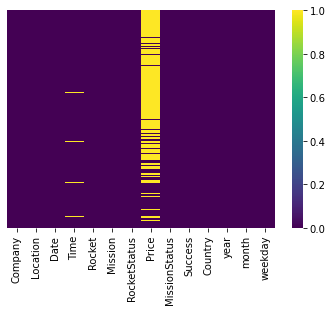

In [31]:
#Checking the heatmap for null values
sns.heatmap(space_df.isnull(), yticklabels = False, cmap='viridis')

In [32]:
#Analysing the country 
country_counts = dict(space_df['Country'].value_counts())
fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Country Name</b>', '<b>Number of Space Missions</b>'],
                line_color='black',
                fill_color='yellow',
                align='left',
                font=dict(color='black', size=14)),
    cells=dict(values=[list(country_counts.keys()),
                      list(country_counts.values())],
               line_color='black',
               fill_color='white',
               align='left',
               font=dict(color='black', size=13)))
])

fig.update_layout(width=500, height=450,margin=dict(l=80, r=80, t=25, b=10),
                  title = { 'text' : '<b>Number of Space Missions Per Launch Location</b>', 'x' : 0.95},
                 font_family = 'Fira Code',title_font_color= 'black')
fig.show()


In [33]:
fig = make_subplots(rows = 3, cols = 1)
for i, period in enumerate(['year', 'month', 'weekday']):
    data = space_df[space_df['MissionStatus'] == 'Failure'][period].value_counts().sort_index()
    data = dict((data / space_df[period].value_counts().sort_index())*100.0)
    mean = sum(data.values()) / len(data)
    if(period == 'year'):
        x = list(data.keys())
    elif(period == 'month'):
        x = ['January', 'February', 'March', 'April', 'May','June', 'July', 'August','September','October', 'November', 'December']
    else:
        x = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
    trace1 = go.Scatter(x = x, y = list(data.values()),mode = 'lines',text = list(data.keys()),name = f'Failures in each {period}',connectgaps = False)
    trace2 = go.Scatter(x = x, y = [mean]*len(data), mode = 'lines',showlegend=False,name = f'Mean failures over the {period}s',line = {'dash':'dash','color':
                                                                                                                                       'grey'})
    fig.append_trace(trace1, row = i+1, col = 1)
    fig.append_trace(trace2, row = i+1, col = 1)
fig.update_layout(template = 'simple_white',height = 600,
                  title = { 'text' : '<b>Failed Missions as a percentage of total missions in that period</b>', 'x' : 0.5})
for i in range(1,4):
    fig.update_yaxes(title_text = '<b>Percentage</b>',row = i, col = 1)
fig.show()
space_df

Company                                         Location       Date  \
0     RVSN USSR        Site 1/5, Baikonur Cosmodrome, Kazakhstan 1957-10-04   
1     RVSN USSR        Site 1/5, Baikonur Cosmodrome, Kazakhstan 1957-11-03   
2       US Navy         LC-18A, Cape Canaveral AFS, Florida, USA 1957-12-06   
3          AMBA         LC-26A, Cape Canaveral AFS, Florida, USA 1958-02-01   
4       US Navy         LC-18A, Cape Canaveral AFS, Florida, USA 1958-02-05   
...         ...                                              ...        ...   
4625     SpaceX          SLC-4E, Vandenberg SFB, California, USA 2022-07-22   
4626       CASC  LC-101, Wenchang Satellite Launch Center, China 2022-07-24   
4627     SpaceX       LC-39A, Kennedy Space Center, Florida, USA 2022-07-24   
4628  CAS Space           Jiuquan Satellite Launch Center, China 2022-07-27   
4629       CASC     LC-3, Xichang Satellite Launch Center, China 2022-07-29   

          Time            Rocket              Mission RocketStatus  Price  \
0     19:28:00    Sputnik 8K71PS            Sputnik-1      Retired    NaN   
1     02:30:00    Sputnik 8K71PS            Sputnik-2      Retired    NaN   
2     16:44:00          Vanguard         Vanguard TV3      Retired    NaN   
3     03:48:00            Juno I           Explorer 1      Retired    NaN   
4     07:33:00          Vanguard       Vanguard TV3BU      Retired    NaN   
...        ...               ...                  ...          ...    ...   
4625  17:39:00  Falcon 9 Block 5   Starlink Group 3-2       Active     67   
4626  06:22:00     Long March 5B              Wentian       Active    NaN   
4627  13:38:00  Falcon 9 Block 5  Starlink Group 4-25       Active     67   
4628  04:12:00        Zhongke-1A          Demo Flight       Active    NaN   
4629  13:28:00     Long March 2D   Yaogan 35 Group 03       Active  29.75   

     MissionStatus  Success     Country  year  month  weekday  
0          Success        1  Kazakhstan  1957     10        4  
1          Success        1  Kazakhstan  1957     11        6  
2          Failure        0         USA  1957     12        4  
3          Success        1         USA  1958      2        5  
4          Failure        0         USA  1958      2        2  
...            ...      ...         ...   ...    ...      ...  
4625       Success        1         USA  2022      7        4  
4626       Success        1       China  2022      7        6  
4627       Success        1         USA  2022      7        6  
4628       Success        1       China  2022      7        2  
4629       Success        1       China  2022      7        4  

[4630 rows x 14 columns]

In [34]:
#Dropping irrevalent/unnecessary columns 

In [35]:
space_df.drop(['Location','Date', 'Time', 'Rocket', 'Mission'], axis=1, inplace=True)
space_df

Company RocketStatus  Price MissionStatus  Success     Country  year  \
0     RVSN USSR      Retired    NaN       Success        1  Kazakhstan  1957   
1     RVSN USSR      Retired    NaN       Success        1  Kazakhstan  1957   
2       US Navy      Retired    NaN       Failure        0         USA  1957   
3          AMBA      Retired    NaN       Success        1         USA  1958   
4       US Navy      Retired    NaN       Failure        0         USA  1958   
...         ...          ...    ...           ...      ...         ...   ...   
4625     SpaceX       Active     67       Success        1         USA  2022   
4626       CASC       Active    NaN       Success        1       China  2022   
4627     SpaceX       Active     67       Success        1         USA  2022   
4628  CAS Space       Active    NaN       Success        1       China  2022   
4629       CASC       Active  29.75       Success        1       China  2022   

      month  weekday  
0        10        4  
1        11        6  
2        12        4  
3         2        5  
4         2        2  
...     ...      ...  
4625      7        4  
4626      7        6  
4627      7        6  
4628      7        2  
4629      7        4  

[4630 rows x 9 columns]

In [36]:
space_df

Company RocketStatus  Price MissionStatus  Success     Country  year  \
0     RVSN USSR      Retired    NaN       Success        1  Kazakhstan  1957   
1     RVSN USSR      Retired    NaN       Success        1  Kazakhstan  1957   
2       US Navy      Retired    NaN       Failure        0         USA  1957   
3          AMBA      Retired    NaN       Success        1         USA  1958   
4       US Navy      Retired    NaN       Failure        0         USA  1958   
...         ...          ...    ...           ...      ...         ...   ...   
4625     SpaceX       Active     67       Success        1         USA  2022   
4626       CASC       Active    NaN       Success        1       China  2022   
4627     SpaceX       Active     67       Success        1         USA  2022   
4628  CAS Space       Active    NaN       Success        1       China  2022   
4629       CASC       Active  29.75       Success        1       China  2022   

      month  weekday  
0        10        4  
1        11        6  
2        12        4  
3         2        5  
4         2        2  
...     ...      ...  
4625      7        4  
4626      7        6  
4627      7        6  
4628      7        2  
4629      7        4  

[4630 rows x 9 columns]

In [37]:
space_df.drop(['RocketStatus','MissionStatus','Price'], axis=1, inplace=True)

In [38]:
space_df

Company  Success     Country  year  month  weekday
0     RVSN USSR        1  Kazakhstan  1957     10        4
1     RVSN USSR        1  Kazakhstan  1957     11        6
2       US Navy        0         USA  1957     12        4
3          AMBA        1         USA  1958      2        5
4       US Navy        0         USA  1958      2        2
...         ...      ...         ...   ...    ...      ...
4625     SpaceX        1         USA  2022      7        4
4626       CASC        1       China  2022      7        6
4627     SpaceX        1         USA  2022      7        6
4628  CAS Space        1       China  2022      7        2
4629       CASC        1       China  2022      7        4

[4630 rows x 6 columns]

In [39]:
space_df["month"].describe()

count    4630.000000
mean        6.765227
std         3.423572
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        12.000000
Name: month, dtype: float64

In [40]:
#One Hot-encoding for Company Name 
pd.get_dummies(space_df['month']).head()

1   2   3   4   5   6   7   8   9   10  11  12
0   0   0   0   0   0   0   0   0   0   1   0   0
1   0   0   0   0   0   0   0   0   0   0   1   0
2   0   0   0   0   0   0   0   0   0   0   0   1
3   0   1   0   0   0   0   0   0   0   0   0   0
4   0   1   0   0   0   0   0   0   0   0   0   0

In [41]:
Month= pd.get_dummies(space_df['month'], drop_first=True)
Month

2   3   4   5   6   7   8   9   10  11  12
0      0   0   0   0   0   0   0   0   1   0   0
1      0   0   0   0   0   0   0   0   0   1   0
2      0   0   0   0   0   0   0   0   0   0   1
3      1   0   0   0   0   0   0   0   0   0   0
4      1   0   0   0   0   0   0   0   0   0   0
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
4625   0   0   0   0   0   1   0   0   0   0   0
4626   0   0   0   0   0   1   0   0   0   0   0
4627   0   0   0   0   0   1   0   0   0   0   0
4628   0   0   0   0   0   1   0   0   0   0   0
4629   0   0   0   0   0   1   0   0   0   0   0

[4630 rows x 11 columns]

In [42]:
Weekday= pd.get_dummies(space_df['weekday'], drop_first=True)
Weekday

1  2  3  4  5  6
0     0  0  0  1  0  0
1     0  0  0  0  0  1
2     0  0  0  1  0  0
3     0  0  0  0  1  0
4     0  1  0  0  0  0
...  .. .. .. .. .. ..
4625  0  0  0  1  0  0
4626  0  0  0  0  0  1
4627  0  0  0  0  0  1
4628  0  1  0  0  0  0
4629  0  0  0  1  0  0

[4630 rows x 6 columns]

In [43]:
Company= pd.get_dummies(space_df['Company'], drop_first=True)
Company

AMBA  ASI  Arianespace  Armée de l'Air  Astra  Blue Origin  Boeing  \
0        0    0            0               0      0            0       0   
1        0    0            0               0      0            0       0   
2        0    0            0               0      0            0       0   
3        1    0            0               0      0            0       0   
4        0    0            0               0      0            0       0   
...    ...  ...          ...             ...    ...          ...     ...   
4625     0    0            0               0      0            0       0   
4626     0    0            0               0      0            0       0   
4627     0    0            0               0      0            0       0   
4628     0    0            0               0      0            0       0   
4629     0    0            0               0      0            0       0   

      CAS Space  CASC  CASIC  ...  Starsem  ULA  US Air Force  US Navy  UT  \
0             0     0      0  ...        0    0             0        0   0   
1             0     0      0  ...        0    0             0        0   0   
2             0     0      0  ...        0    0             0        1   0   
3             0     0      0  ...        0    0             0        0   0   
4             0     0      0  ...        0    0             0        1   0   
...         ...   ...    ...  ...      ...  ...           ...      ...  ..   
4625          0     0      0  ...        0    0             0        0   0   
4626          0     1      0  ...        0    0             0        0   0   
4627          0     0      0  ...        0    0             0        0   0   
4628          1     0      0  ...        0    0             0        0   0   
4629          0     1      0  ...        0    0             0        0   0   

      VKS RF  Virgin Galactic  Virgin Orbit  Yuzhmash  i-Space  
0          0                0             0         0        0  
1          0                0             0         0        0  
2          0                0             0         0        0  
3          0                0             0         0        0  
4          0                0             0         0        0  
...      ...              ...           ...       ...      ...  
4625       0                0             0         0        0  
4626       0                0             0         0        0  
4627       0                0             0         0        0  
4628       0                0             0         0        0  
4629       0                0             0         0        0  

[4630 rows x 61 columns]

# Concatanation with dataset

In [44]:
space_df= pd.concat([space_df, Company], axis=1)

In [45]:
space_df= pd.concat([space_df, Month], axis=1)

In [46]:
space_df= pd.concat([space_df, Weekday], axis=1)
space_df

Company  Success     Country  year  month  weekday  AMBA  ASI  \
0     RVSN USSR        1  Kazakhstan  1957     10        4     0    0   
1     RVSN USSR        1  Kazakhstan  1957     11        6     0    0   
2       US Navy        0         USA  1957     12        4     0    0   
3          AMBA        1         USA  1958      2        5     1    0   
4       US Navy        0         USA  1958      2        2     0    0   
...         ...      ...         ...   ...    ...      ...   ...  ...   
4625     SpaceX        1         USA  2022      7        4     0    0   
4626       CASC        1       China  2022      7        6     0    0   
4627     SpaceX        1         USA  2022      7        6     0    0   
4628  CAS Space        1       China  2022      7        2     0    0   
4629       CASC        1       China  2022      7        4     0    0   

      Arianespace  Armée de l'Air  ...  9  10  11  12  1  2  3  4  5  6  
0               0               0  ...  0   1   0   0  0  0  0  1  0  0  
1               0               0  ...  0   0   1   0  0  0  0  0  0  1  
2               0               0  ...  0   0   0   1  0  0  0  1  0  0  
3               0               0  ...  0   0   0   0  0  0  0  0  1  0  
4               0               0  ...  0   0   0   0  0  1  0  0  0  0  
...           ...             ...  ... ..  ..  ..  .. .. .. .. .. .. ..  
4625            0               0  ...  0   0   0   0  0  0  0  1  0  0  
4626            0               0  ...  0   0   0   0  0  0  0  0  0  1  
4627            0               0  ...  0   0   0   0  0  0  0  0  0  1  
4628            0               0  ...  0   0   0   0  0  1  0  0  0  0  
4629            0               0  ...  0   0   0   0  0  0  0  1  0  0  

[4630 rows x 84 columns]

In [47]:
space_df.to_csv("spaceb.csv", index=False)

In [48]:
space_df

Company  Success     Country  year  month  weekday  AMBA  ASI  \
0     RVSN USSR        1  Kazakhstan  1957     10        4     0    0   
1     RVSN USSR        1  Kazakhstan  1957     11        6     0    0   
2       US Navy        0         USA  1957     12        4     0    0   
3          AMBA        1         USA  1958      2        5     1    0   
4       US Navy        0         USA  1958      2        2     0    0   
...         ...      ...         ...   ...    ...      ...   ...  ...   
4625     SpaceX        1         USA  2022      7        4     0    0   
4626       CASC        1       China  2022      7        6     0    0   
4627     SpaceX        1         USA  2022      7        6     0    0   
4628  CAS Space        1       China  2022      7        2     0    0   
4629       CASC        1       China  2022      7        4     0    0   

      Arianespace  Armée de l'Air  ...  9  10  11  12  1  2  3  4  5  6  
0               0               0  ...  0   1   0   0  0  0  0  1  0  0  
1               0               0  ...  0   0   1   0  0  0  0  0  0  1  
2               0               0  ...  0   0   0   1  0  0  0  1  0  0  
3               0               0  ...  0   0   0   0  0  0  0  0  1  0  
4               0               0  ...  0   0   0   0  0  1  0  0  0  0  
...           ...             ...  ... ..  ..  ..  .. .. .. .. .. .. ..  
4625            0               0  ...  0   0   0   0  0  0  0  1  0  0  
4626            0               0  ...  0   0   0   0  0  0  0  0  0  1  
4627            0               0  ...  0   0   0   0  0  0  0  0  0  1  
4628            0               0  ...  0   0   0   0  0  1  0  0  0  0  
4629            0               0  ...  0   0   0   0  0  0  0  1  0  0  

[4630 rows x 84 columns]

# Dropping Company Name and Country

In [49]:
space_df.drop(labels=['Company','Country','year', 'month', 'weekday'], axis=1, inplace=True) #inplace=True make it parmanent

In [50]:
space_df.drop(labels=['Price',], axis=1, inplace=True)

KeyError: "['Price'] not found in axis"

In [51]:
space_df

Success  AMBA  ASI  Arianespace  Armée de l'Air  Astra  Blue Origin  \
0           1     0    0            0               0      0            0   
1           1     0    0            0               0      0            0   
2           0     0    0            0               0      0            0   
3           1     1    0            0               0      0            0   
4           0     0    0            0               0      0            0   
...       ...   ...  ...          ...             ...    ...          ...   
4625        1     0    0            0               0      0            0   
4626        1     0    0            0               0      0            0   
4627        1     0    0            0               0      0            0   
4628        1     0    0            0               0      0            0   
4629        1     0    0            0               0      0            0   

      Boeing  CAS Space  CASC  ...  9  10  11  12  1  2  3  4  5  6  
0          0          0     0  ...  0   1   0   0  0  0  0  1  0  0  
1          0          0     0  ...  0   0   1   0  0  0  0  0  0  1  
2          0          0     0  ...  0   0   0   1  0  0  0  1  0  0  
3          0          0     0  ...  0   0   0   0  0  0  0  0  1  0  
4          0          0     0  ...  0   0   0   0  0  1  0  0  0  0  
...      ...        ...   ...  ... ..  ..  ..  .. .. .. .. .. .. ..  
4625       0          0     0  ...  0   0   0   0  0  0  0  1  0  0  
4626       0          0     1  ...  0   0   0   0  0  0  0  0  0  1  
4627       0          0     0  ...  0   0   0   0  0  0  0  0  0  1  
4628       0          1     0  ...  0   0   0   0  0  1  0  0  0  0  
4629       0          0     1  ...  0   0   0   0  0  0  0  1  0  0  

[4630 rows x 79 columns]

# Finding Relationship with time

In [52]:
space_df

Success  AMBA  ASI  Arianespace  Armée de l'Air  Astra  Blue Origin  \
0           1     0    0            0               0      0            0   
1           1     0    0            0               0      0            0   
2           0     0    0            0               0      0            0   
3           1     1    0            0               0      0            0   
4           0     0    0            0               0      0            0   
...       ...   ...  ...          ...             ...    ...          ...   
4625        1     0    0            0               0      0            0   
4626        1     0    0            0               0      0            0   
4627        1     0    0            0               0      0            0   
4628        1     0    0            0               0      0            0   
4629        1     0    0            0               0      0            0   

      Boeing  CAS Space  CASC  ...  9  10  11  12  1  2  3  4  5  6  
0          0          0     0  ...  0   1   0   0  0  0  0  1  0  0  
1          0          0     0  ...  0   0   1   0  0  0  0  0  0  1  
2          0          0     0  ...  0   0   0   1  0  0  0  1  0  0  
3          0          0     0  ...  0   0   0   0  0  0  0  0  1  0  
4          0          0     0  ...  0   0   0   0  0  1  0  0  0  0  
...      ...        ...   ...  ... ..  ..  ..  .. .. .. .. .. .. ..  
4625       0          0     0  ...  0   0   0   0  0  0  0  1  0  0  
4626       0          0     1  ...  0   0   0   0  0  0  0  0  0  1  
4627       0          0     0  ...  0   0   0   0  0  0  0  0  0  1  
4628       0          1     0  ...  0   0   0   0  0  1  0  0  0  0  
4629       0          0     1  ...  0   0   0   0  0  0  0  1  0  0  

[4630 rows x 79 columns]

In [53]:
space_df

Success  AMBA  ASI  Arianespace  Armée de l'Air  Astra  Blue Origin  \
0           1     0    0            0               0      0            0   
1           1     0    0            0               0      0            0   
2           0     0    0            0               0      0            0   
3           1     1    0            0               0      0            0   
4           0     0    0            0               0      0            0   
...       ...   ...  ...          ...             ...    ...          ...   
4625        1     0    0            0               0      0            0   
4626        1     0    0            0               0      0            0   
4627        1     0    0            0               0      0            0   
4628        1     0    0            0               0      0            0   
4629        1     0    0            0               0      0            0   

      Boeing  CAS Space  CASC  ...  9  10  11  12  1  2  3  4  5  6  
0          0          0     0  ...  0   1   0   0  0  0  0  1  0  0  
1          0          0     0  ...  0   0   1   0  0  0  0  0  0  1  
2          0          0     0  ...  0   0   0   1  0  0  0  1  0  0  
3          0          0     0  ...  0   0   0   0  0  0  0  0  1  0  
4          0          0     0  ...  0   0   0   0  0  1  0  0  0  0  
...      ...        ...   ...  ... ..  ..  ..  .. .. .. .. .. .. ..  
4625       0          0     0  ...  0   0   0   0  0  0  0  1  0  0  
4626       0          0     1  ...  0   0   0   0  0  0  0  0  0  1  
4627       0          0     0  ...  0   0   0   0  0  0  0  0  0  1  
4628       0          1     0  ...  0   0   0   0  0  1  0  0  0  0  
4629       0          0     1  ...  0   0   0   0  0  0  0  1  0  0  

[4630 rows x 79 columns]

# Train and Test the Data

In [54]:
x = space_df.drop('Success', axis=1)
x.head()

AMBA  ASI  Arianespace  Armée de l'Air  Astra  Blue Origin  Boeing  \
0     0    0            0               0      0            0       0   
1     0    0            0               0      0            0       0   
2     0    0            0               0      0            0       0   
3     1    0            0               0      0            0       0   
4     0    0            0               0      0            0       0   

   CAS Space  CASC  CASIC  ...  9  10  11  12  1  2  3  4  5  6  
0          0     0      0  ...  0   1   0   0  0  0  0  1  0  0  
1          0     0      0  ...  0   0   1   0  0  0  0  0  0  1  
2          0     0      0  ...  0   0   0   1  0  0  0  1  0  0  
3          0     0      0  ...  0   0   0   0  0  0  0  0  1  0  
4          0     0      0  ...  0   0   0   0  0  1  0  0  0  0  

[5 rows x 78 columns]

In [55]:
y = space_df['Success']
y.head()

0    1
1    1
2    0
3    1
4    0
Name: Success, dtype: uint8

<AxesSubplot:>

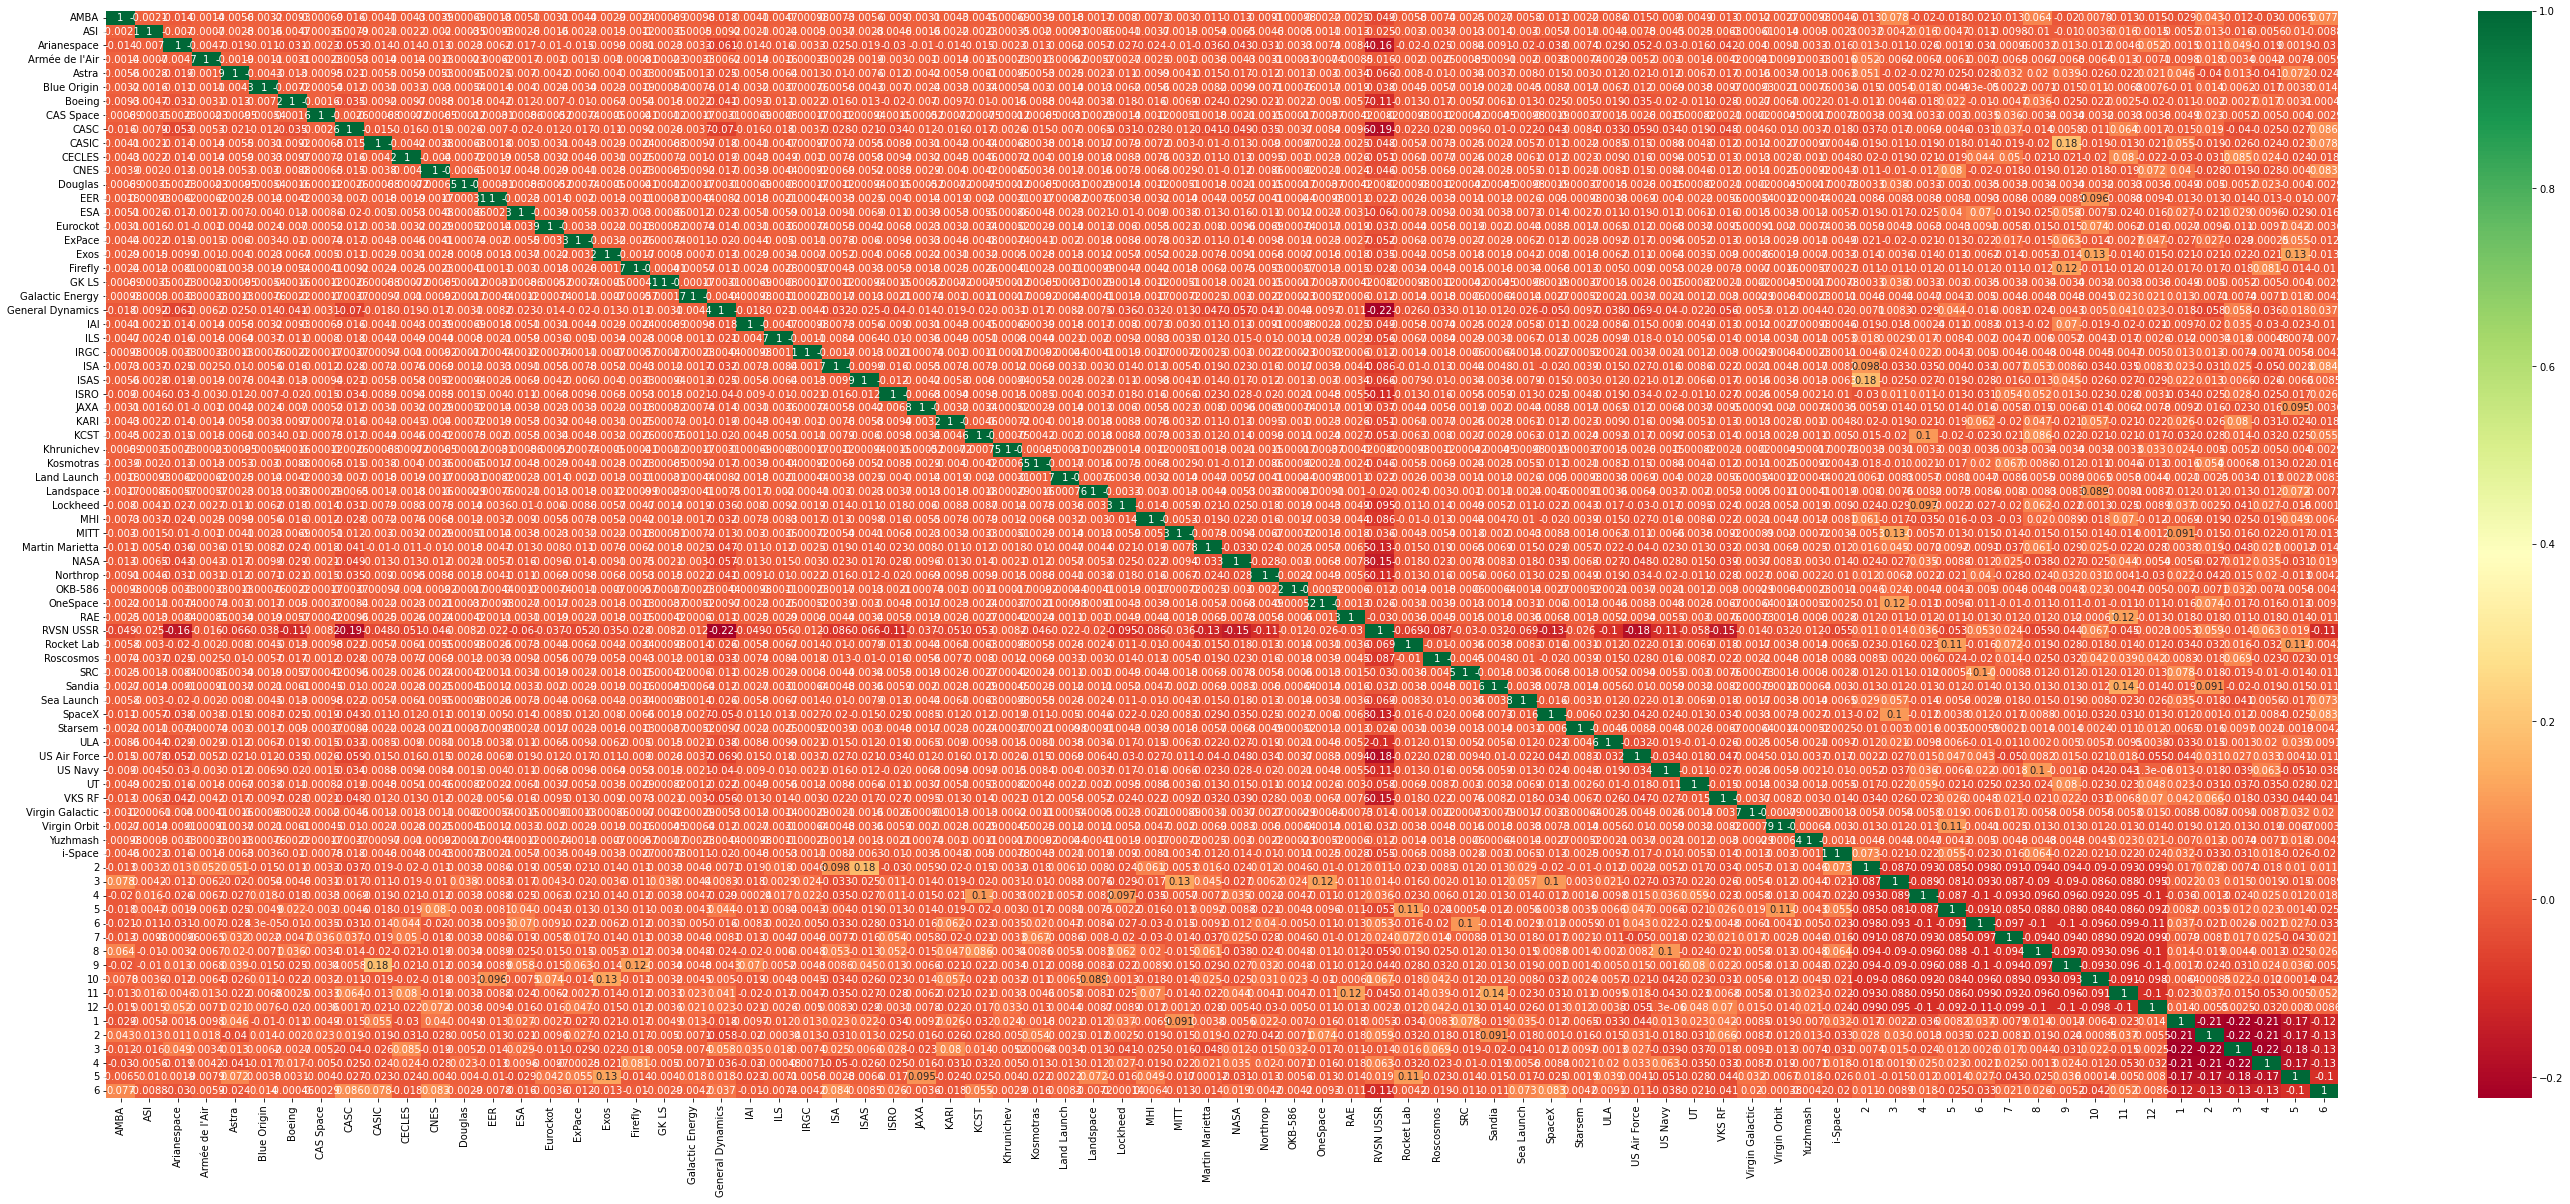

In [87]:
plt.subplots(figsize=(50,20))
sns.heatmap(x.corr(), annot=True, cmap='RdYlGn')

In [57]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: Success, dtype: uint8

In [58]:
x.head()

AMBA  ASI  Arianespace  Armée de l'Air  Astra  Blue Origin  Boeing  \
0     0    0            0               0      0            0       0   
1     0    0            0               0      0            0       0   
2     0    0            0               0      0            0       0   
3     1    0            0               0      0            0       0   
4     0    0            0               0      0            0       0   

   CAS Space  CASC  CASIC  ...  9  10  11  12  1  2  3  4  5  6  
0          0     0      0  ...  0   1   0   0  0  0  0  1  0  0  
1          0     0      0  ...  0   0   1   0  0  0  0  0  0  1  
2          0     0      0  ...  0   0   0   1  0  0  0  1  0  0  
3          0     0      0  ...  0   0   0   0  0  0  0  0  1  0  
4          0     0      0  ...  0   0   0   0  0  1  0  0  0  0  

[5 rows x 78 columns]

# Random Over Sampling - Data Balancing







<AxesSubplot:ylabel='Success'>

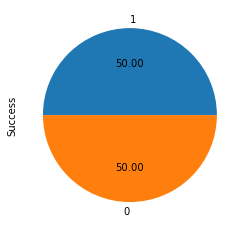

In [61]:
# Checking data 
y.value_counts().plot.pie(autopct='%.2f') 

In [62]:
from imblearn import over_sampling, under_sampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter 
ros = RandomOverSampler (random_state = 0)
x,y = ros.fit_resample(x, y)
print (sorted(Counter(y).items()))


[(0, 4269), (1, 4269)]


In [63]:
space_df['Success'].describe()

count    4630.000000
mean        0.922030
std         0.268153
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Success, dtype: float64

In [64]:
y.shape
x.shape

(8538, 78)

# Spliting the dataframe into test and train datasets

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1)

In [66]:
x_train

AMBA  ASI  Arianespace  Armée de l'Air  Astra  Blue Origin  Boeing  \
331      0    0            0               0      0            0       0   
3491     0    0            1               0      0            0       0   
2573     0    0            0               0      0            0       0   
8016     0    0            0               0      0            0       0   
5408     0    0            0               0      0            0       0   
...    ...  ...          ...             ...    ...          ...     ...   
2895     0    0            0               0      0            0       0   
7813     0    0            0               0      0            0       0   
905      0    0            0               0      0            0       0   
5192     0    0            0               0      0            0       0   
235      0    0            0               0      0            0       0   

      CAS Space  CASC  CASIC  ...  9  10  11  12  1  2  3  4  5  6  
331           0     0      0  ...  0   0   0   0  0  0  0  1  0  0  
3491          0     0      0  ...  0   0   0   0  0  0  0  0  0  1  
2573          0     0      0  ...  0   0   0   0  0  1  0  0  0  0  
8016          0     0      0  ...  0   1   0   0  0  0  0  0  0  0  
5408          0     0      0  ...  0   0   0   0  0  1  0  0  0  0  
...         ...   ...    ...  ... ..  ..  ..  .. .. .. .. .. .. ..  
2895          0     0      0  ...  0   0   0   0  0  1  0  0  0  0  
7813          0     0      0  ...  0   1   0   0  0  0  0  0  0  0  
905           0     0      0  ...  0   1   0   0  1  0  0  0  0  0  
5192          0     0      0  ...  0   0   0   1  1  0  0  0  0  0  
235           0     0      0  ...  0   0   0   0  0  0  1  0  0  0  

[6830 rows x 78 columns]

In [67]:
x_test

AMBA  ASI  Arianespace  Armée de l'Air  Astra  Blue Origin  Boeing  \
5282     0    0            0               0      0            0       0   
3984     0    0            1               0      0            0       0   
6406     0    0            0               0      0            0       0   
8202     0    0            0               0      0            0       0   
6250     0    0            0               0      0            0       0   
...    ...  ...          ...             ...    ...          ...     ...   
6266     0    0            0               0      0            0       0   
2774     0    0            0               0      0            0       0   
470      0    0            0               0      0            0       0   
901      0    0            0               0      0            0       0   
3530     0    0            0               0      0            0       0   

      CAS Space  CASC  CASIC  ...  9  10  11  12  1  2  3  4  5  6  
5282          0     0      0  ...  0   0   0   0  0  0  0  0  0  0  
3984          0     0      0  ...  0   0   0   0  0  1  0  0  0  0  
6406          0     0      0  ...  0   0   0   0  0  0  1  0  0  0  
8202          0     0      0  ...  0   0   0   0  0  0  0  0  0  1  
6250          0     0      0  ...  1   0   0   0  0  0  0  1  0  0  
...         ...   ...    ...  ... ..  ..  ..  .. .. .. .. .. .. ..  
6266          0     0      0  ...  1   0   0   0  0  0  0  0  1  0  
2774          0     0      0  ...  0   1   0   0  0  0  1  0  0  0  
470           0     0      0  ...  0   0   0   0  0  1  0  0  0  0  
901           0     0      0  ...  0   1   0   0  0  1  0  0  0  0  
3530          0     1      0  ...  0   0   1   0  0  1  0  0  0  0  

[1708 rows x 78 columns]

In [68]:
y_train

331     0
3491    1
2573    1
8016    0
5408    0
       ..
2895    1
7813    0
905     1
5192    0
235     1
Name: Success, Length: 6830, dtype: uint8

In [69]:
y_test

5282    0
3984    1
6406    0
8202    0
6250    0
       ..
6266    0
2774    1
470     1
901     1
3530    1
Name: Success, Length: 1708, dtype: uint8

In [70]:
y_train.value_counts()

0    3422
1    3408
Name: Success, dtype: int64

# Step 4: Model 

# Implementing Logistic Regression Algorithm 

In [71]:
LR = LogisticRegression()

In [72]:
LR

LogisticRegression()

In [73]:
LR.fit(x_train, y_train)

LogisticRegression()

# Prediction 

In [74]:
prediction = LR.predict (x_test)

In [75]:
prediction

array([1, 1, 0, ..., 0, 1, 1], dtype=uint8)

# Step 5: Interpretate 

# Accuracy Report

In [76]:
from sklearn.metrics import classification_report 

In [77]:
print (classification_report (y_test, prediction))

              precision    recall  f1-score   support

           0       0.71      0.55      0.62       847
           1       0.64      0.78      0.70       861

    accuracy                           0.67      1708
   macro avg       0.67      0.67      0.66      1708
weighted avg       0.67      0.67      0.66      1708



# Implementation of Confusion Matrix 

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test, prediction)

array([[468, 379],
       [191, 670]], dtype=int64)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.6662763466042154

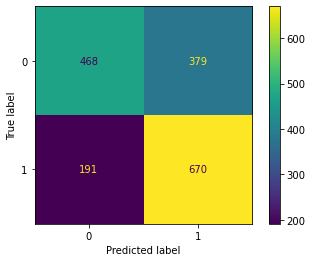

In [80]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LR, x_test, y_test)
plt.show()

# ROC Curve

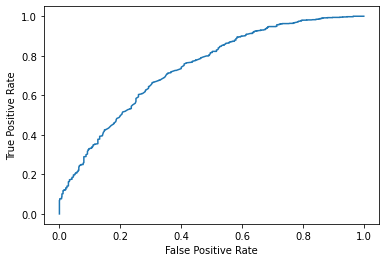

In [81]:
from sklearn import metrics
y_pred_proba = LR.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC Curve

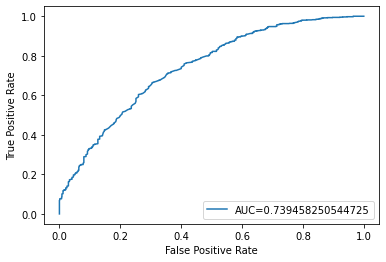

In [82]:
y_pred_proba = LR.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Hyperparameter Tuning : GridSearchCV

In [83]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}

#LR=LogisticRegression

LR_cv=GridSearchCV(LR,grid,cv=10)
bestLRCV=LR_cv.fit(x_train,y_train)

print("\nTuned hpyerparameters : best parameters - ",LR_cv.best_params_)
print("\nAccuracy :",LR_cv.best_score_)


Tuned hpyerparameters : best parameters -  {'C': 100.0, 'penalty': 'l2'}

Accuracy : 0.6437774524158126


In [84]:
print (f'Accuracy - : {bestLRCV.score(x,y):.3f}')

Accuracy - : 0.659


In [273]:
#Conclusion: Accuracy Updated with oversampling and Hyperparameter Tuning